In [8]:
# Convolutional Neural Networks in TensorFlow by deeplearning.ai on Coursera
# Exercise_4_Multi_class_classifier_Question-FINAL
# https://www.kaggle.com/datamunge/sign-language-mnist

In [9]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [10]:
def get_data(filename):
with open(filename) as training_file:
        csv_reader = csv.reader(training_file)
        next(csv_reader)
        labels = []
        images = []
        for row in csv_reader: 
            labels.append(row[0])
            images.append(np.array(row[1:785]).astype(np.float32))
            
    labels = np.array(labels).astype('float')
    images = np.array([np.array_split(image, 28) for image in images])
    return images, labels

path_sign_mnist_train = f"{getcwd()}/data_mnist/sign_mnist_train/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/data_mnist/sign_mnist_test/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [12]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
    
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 857.96875 steps, validate for 224.125 steps
Epoch 1/15
858/857 [==============================] - 21s 24ms/step - loss: 2.8970 - accuracy: 0.1293 - val_loss: 2.0959 - val_accuracy: 0.3263
Epoch 2/15
858/857 [==============================] - 19s 22ms/step - loss: 2.3134 - accuracy: 0.2766 - val_loss: 1.4591 - val_accuracy: 0.5566
Epoch 3/15
858/857 [==============================] - 20s 23ms/step - loss: 2.0030 - accuracy: 0.3650 - val_loss: 1.1834 - val_accuracy: 0.5986
Epoch 4/15
858/857 [==============================] - 20s 23ms/step - loss: 1.7817 - accuracy: 0.4328 - val_loss: 0.9890 - val_accuracy: 0.6889
Epoch 5/15
858/857 [==============================] - 20s 23ms/step - loss: 1.6233 - accuracy: 0.4772 - val_loss: 0.9569 - val_accuracy: 0.6556
Epoch 6/15
858/857 [==============================] - 19s 22ms/step - loss: 1.5026 - accuracy: 0.517

[127.5918957252311, 0.64626324]

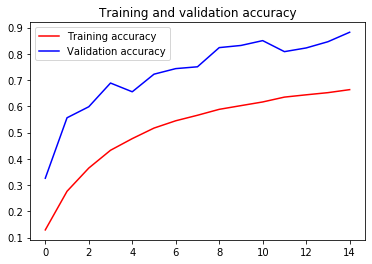

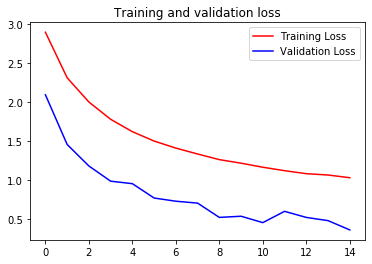

In [14]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()